In [93]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os, sys
from datetime import datetime
import pandas as pd
from dataimport import import_zaehlstellen


from mpl_toolkits import mplot3d



In [2]:
dirname = 'data/zaehlstellen'
files = [f"{dirname}/{name}" for name in os.listdir(dirname)]
files

['data/zaehlstellen/Zaehlstelle_Herose_2019_stuendlich_Wetter.csv',
 'data/zaehlstellen/Zaehlstelle_Herose_2018_stuendlich.csv',
 'data/zaehlstellen/Zaehlstelle_Herose_2019_15min.csv',
 'data/zaehlstellen/Zaehlstelle_Herose_2018_stuendlich_Wetter.csv',
 'data/zaehlstellen/Zaehlstelle_Herose_2020_15min.csv',
 'data/zaehlstellen/Zaehlstelle_Herose_2021_15min.csv',
 'data/zaehlstellen/Zaehlstelle_Herose_2020_stuendlich_Wetter.csv',
 'data/zaehlstellen/Zaehlstelle_Herose_2021_stuendlich_Wetter.csv']

In [3]:
df2018 = import_zaehlstellen('data/zaehlstellen/Zaehlstelle_Herose_2018_stuendlich_Wetter.csv')
df2019 = import_zaehlstellen('data/zaehlstellen/Zaehlstelle_Herose_2019_stuendlich_Wetter.csv')
df2020 = import_zaehlstellen('data/zaehlstellen/Zaehlstelle_Herose_2020_stuendlich_Wetter.csv')
df2021 = import_zaehlstellen('data/zaehlstellen/Zaehlstelle_Herose_2021_stuendlich_Wetter.csv')

In [97]:
def daytoint(s):
    if isinstance(s, int):
        return s
    return {
        "Monday": 1,
        "Tuesday": 2,
        "Wednesday": 3,
        "Thursday": 4,
        "Friday": 5,
        "Saturday": 6,
        "Sunday": 7,
    }[s] 

def dayname_key(s):
    return s.apply(daytoint)

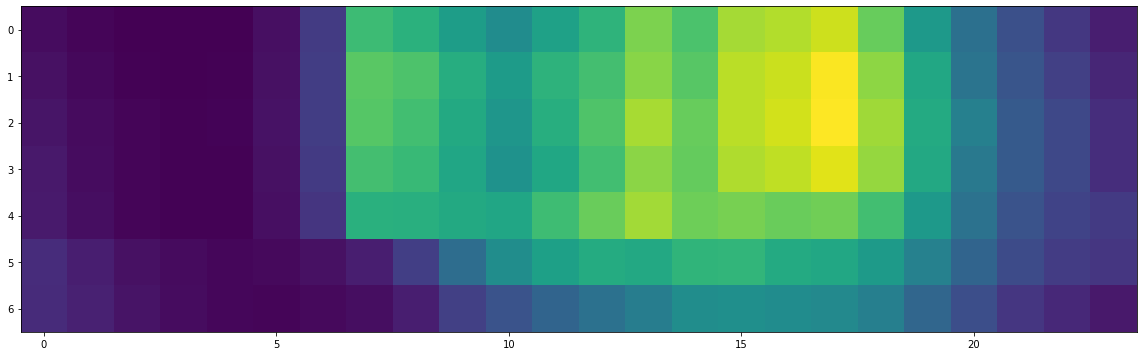

In [124]:
d = df2020.groupby(["Dayname", "Hour"]).agg({"Fahrradbrücke": sum})
d = d.sort_values(["Dayname", "Hour"], key=dayname_key)

fig, ax = plt.subplots(figsize=(20, 10))

ax.imshow(np.array(d["Fahrradbrücke"]).reshape((7,int(168/7))))

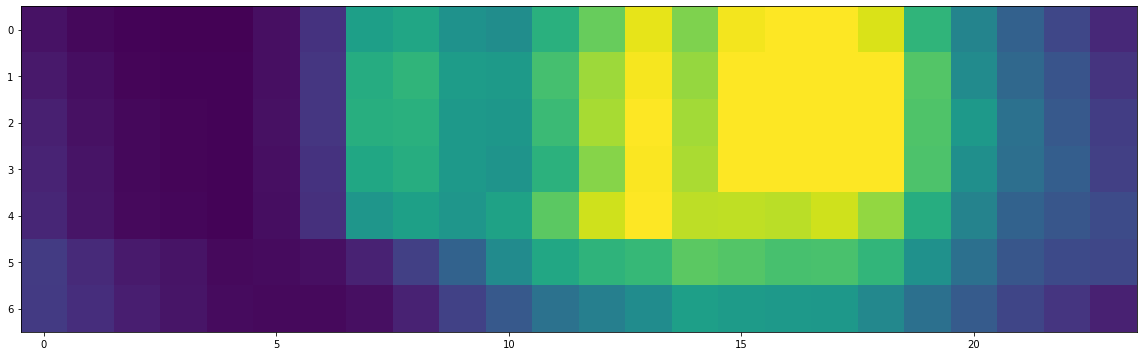

In [137]:
d = df2020.groupby(["Dayname", "Hour"]).agg({"Fahrradbrücke stadtauswärts": sum})
d = d.sort_values(["Dayname", "Hour"], key=dayname_key)

fig, ax = plt.subplots(figsize=(20, 10))

ax.imshow(np.array(d["Fahrradbrücke stadtauswärts"]).reshape((7,int(168/7))), vmin=0, vmax=20000)

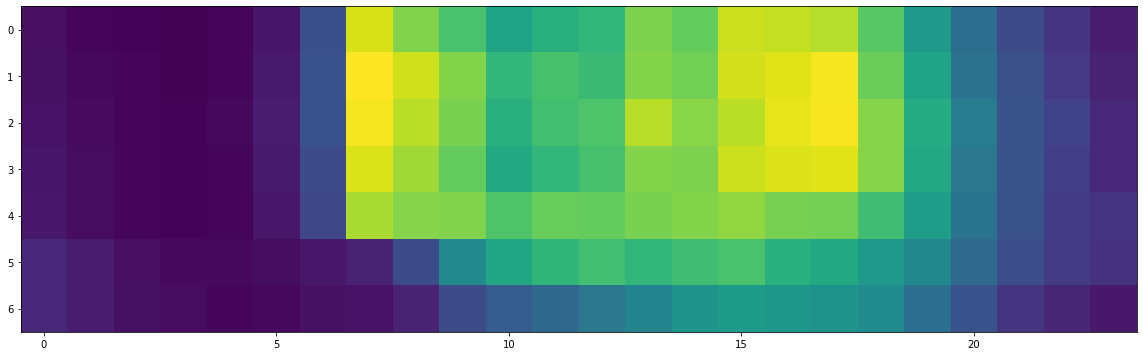

In [136]:
d = df2020.groupby(["Dayname", "Hour"]).agg({"Fahrradbrücke stadteinwärts": sum})
d = d.sort_values(["Dayname", "Hour"], key=dayname_key)

fig, ax = plt.subplots(figsize=(20, 10))

ax.imshow(np.array(d["Fahrradbrücke stadteinwärts"]).reshape((7,int(168/7))), vmin=0, vmax=20000)